【About This Notebook】

Change point detection based on singular spectrum transformation.

【Reference】
- 井手剛「入門 機械学習による異常検知」（コロナ社，2015）第５章
- 井手剛，杉山将「異常検知と変化検知」（講談社，2015）第9章

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

import sys
sys.path.append('../')

from pycpsst import ChangePointSST
%matplotlib inline

# Sample Data Preparation
- 1d timeseries with frequency changes
- Used the sample generator of [ruptures](http://ctruong.perso.math.cnrs.fr/ruptures-docs/build/html/index.html#)

## Data Generation

(<Figure size 720x144 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x11ec426d0>])

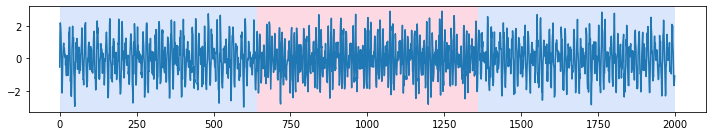

In [15]:
# creation of data
n = 2000  # number of samples, dimension
n_bkps, sigma = 2, 0.5  # number of change points, noise standart deviation
signal, bkps = rpt.pw_wavy(n, n_bkps, noise_std=sigma)
rpt.display(signal, bkps)

## Periodogram

In [16]:
def display_periodogram(signal, NFFT=100, Fs=1):
    '''
    NFFT = 100  # the length of the windowing segments
    Fs = 1  # the sampling frequency
    '''
    t = np.arange(signal.shape[0])

    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
    ax1.plot(t, signal)
    Pxx, freqs, bins, im = ax2.specgram(signal, NFFT=NFFT, Fs=Fs, noverlap=80)
    
    return fig, (ax1, ax2)

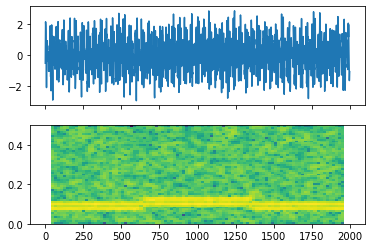

In [20]:
display_periodogram(signal);

# サンプル時系列全体で実行

In [18]:
Lm = 200
L_train, L_target = 150, 50
w = 30

sst = ChangePointSST(L_train=L_train, L_target=L_target, w=w)

Kw = signal.shape[0] - Lm + 1
sst_results = np.array([sst.score(signal[i:i+Lm]) for i in range(0, Kw)])

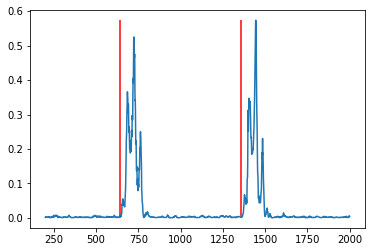

In [21]:
t_results = Lm + np.arange(0, sst_results.shape[0])# - L_target
plt.plot(t_results, sst_results)
plt.vlines(bkps[:-1], 0, sst_results.max(), linestyles='solid', colors='red');